       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  
3         0 

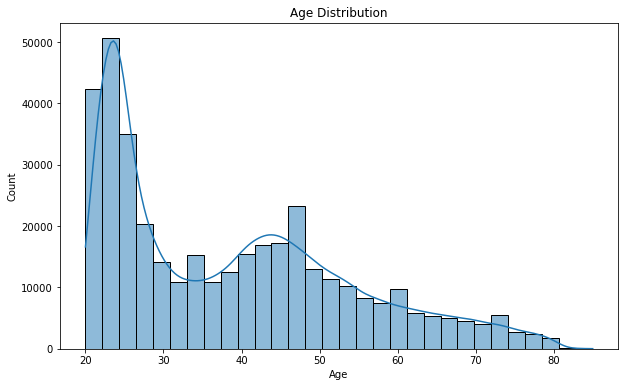

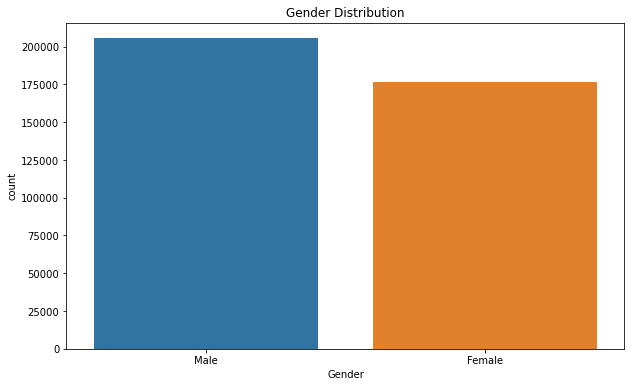

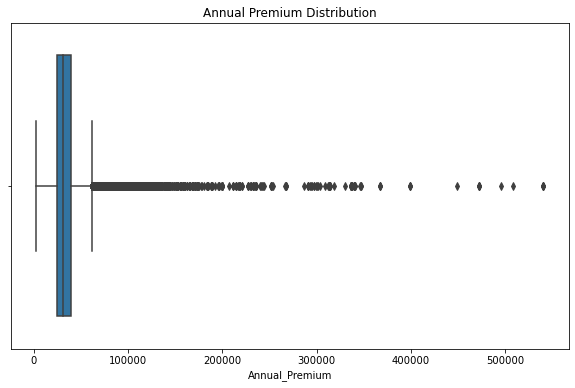

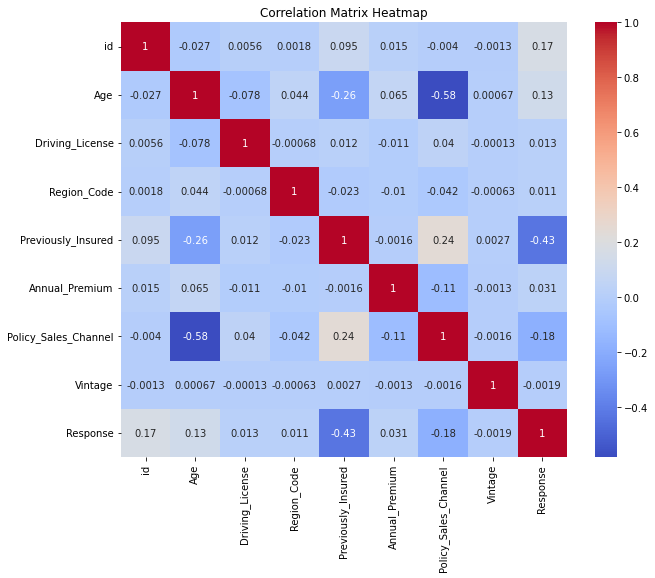

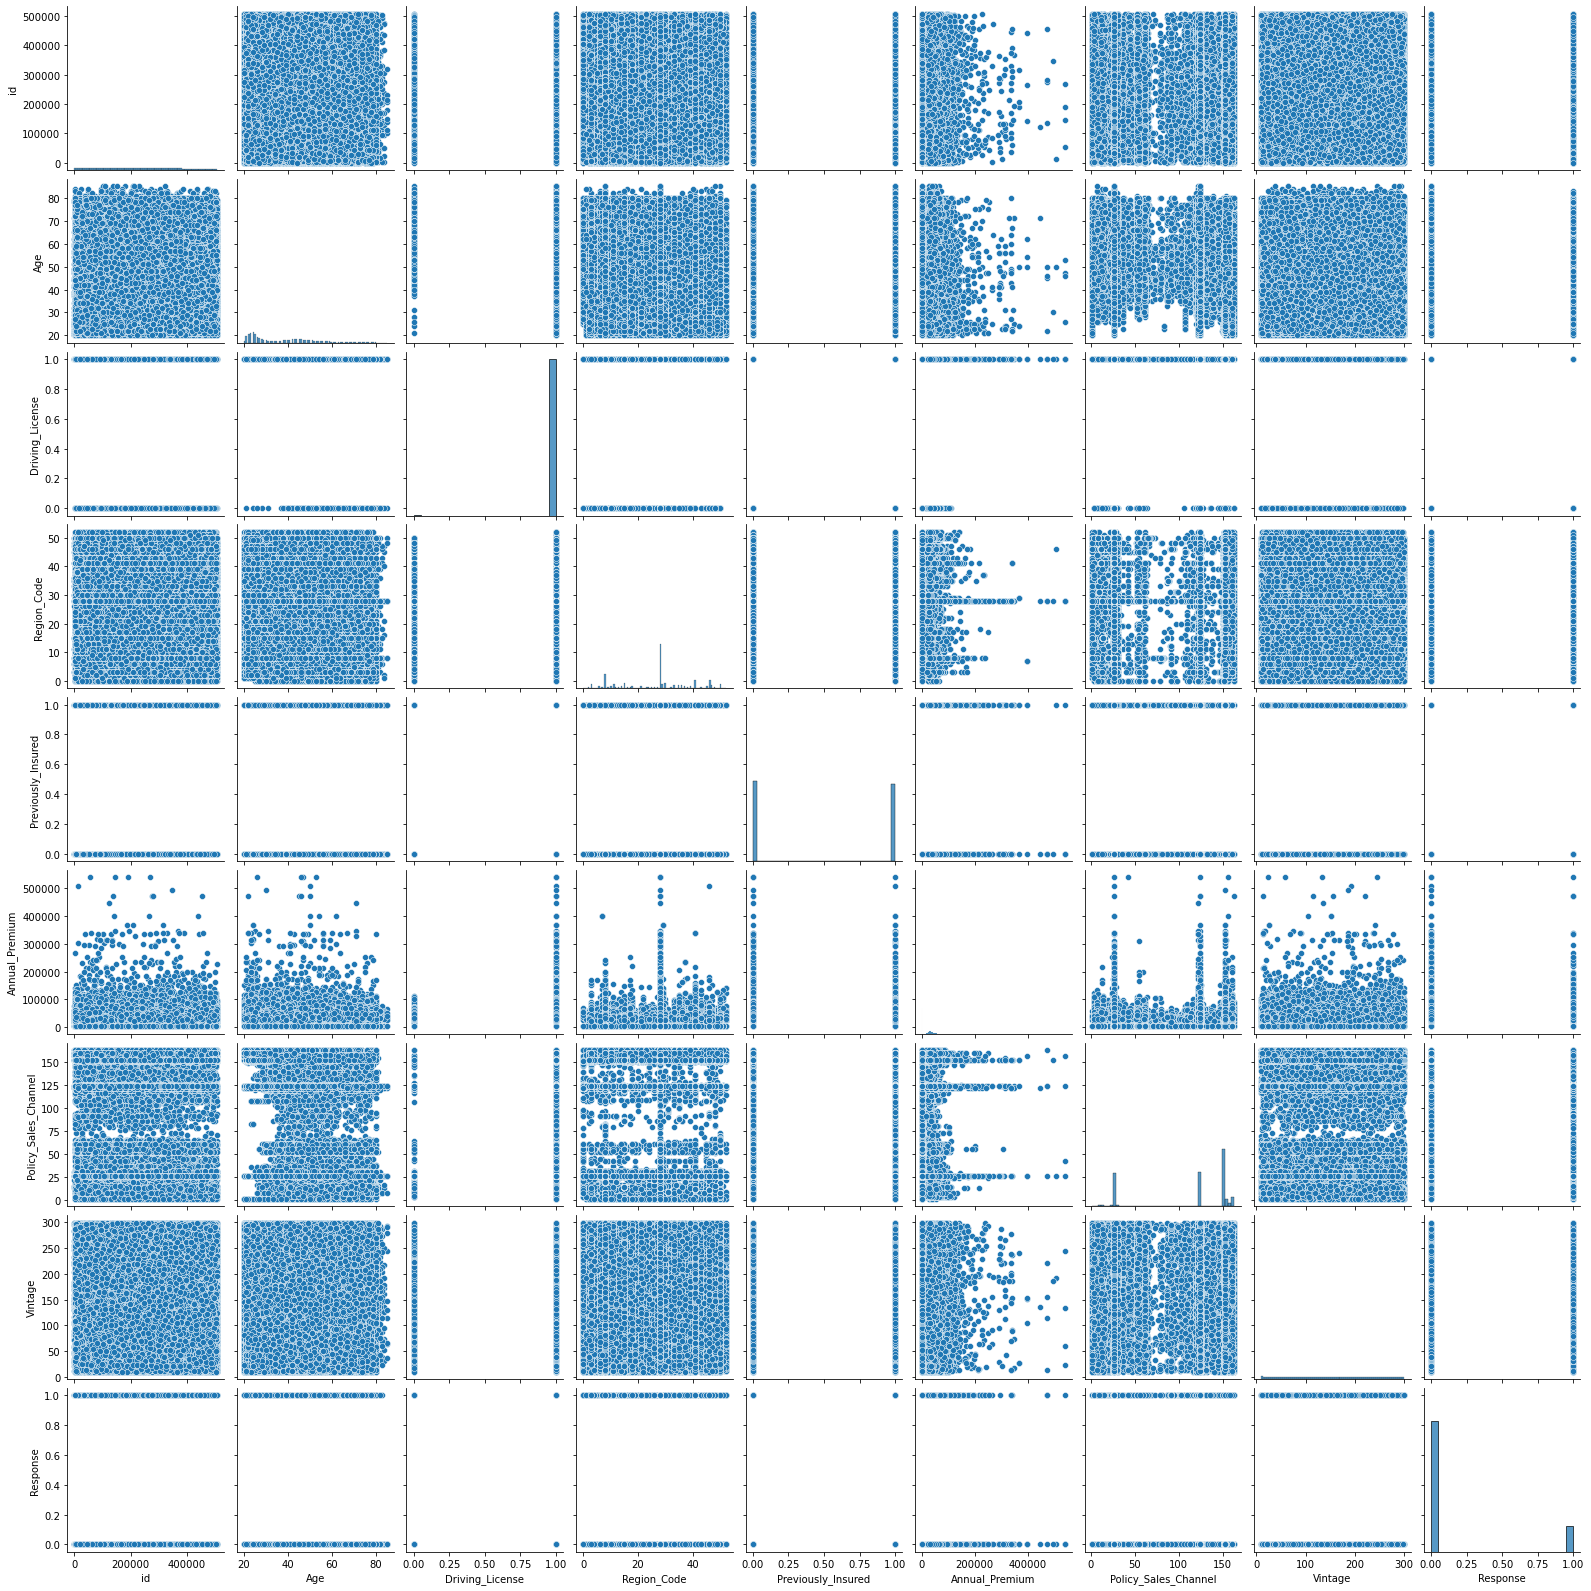

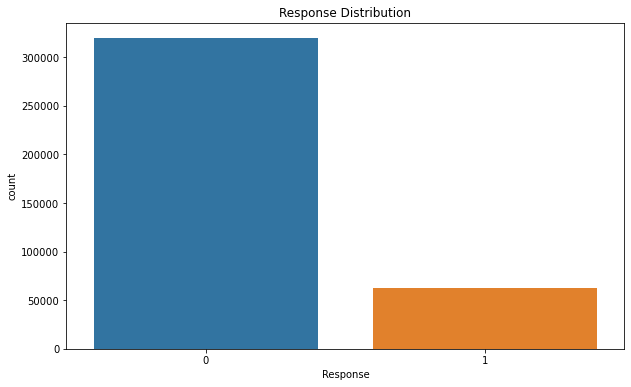

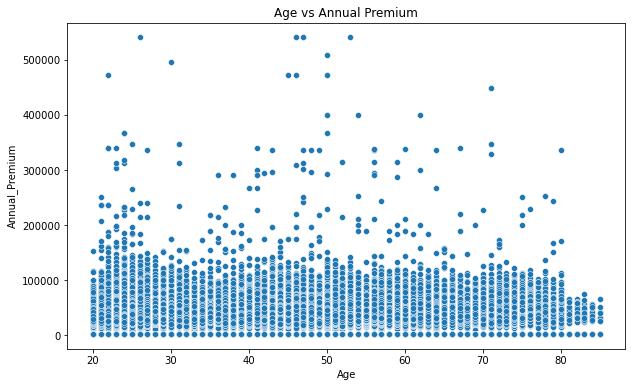

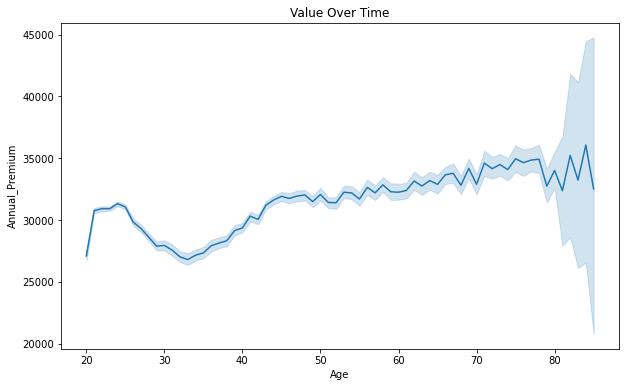

In [6]:
# Step 1: Import necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data from Excel file
df = pd.read_csv("C:/Users/ritti/Downloads/SET1_PROJECT/vehicle_insurance/aug_train.csv")

# Step 3: Check the first few rows of the DataFrame
print(df.head())

# Step 4: Generate summary statistics of the DataFrame
print(df.describe())

# Step 5: Check for missing values
print(df.isnull().sum())

# Step 6: Plot a histogram for 'Age' column
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Step 7: Plot a bar chart for 'Gender' column
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Step 8: Plot a boxplot for 'Annual_Premium' column
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Annual_Premium')
plt.title('Annual Premium Distribution')
plt.show()

# Step 9: Plot a correlation matrix heatmap for all numeric columns
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 10: Plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Step 11: Plot a countplot for 'Response' column to see target distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Response')
plt.title('Response Distribution')
plt.show()

# Scatter plot for 'Age' vs 'Annual_Premium'
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Annual_Premium')
plt.title('Age vs Annual Premium')
plt.show()

# Line chart example (modify as needed)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Age', y='Annual_Premium')
plt.title('Value Over Time')
plt.show()




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load training and testing data from separate Excel files
train_data = pd.read_csv("C:/Users/ritti/Downloads/SET1_PROJECT/vehicle_insurance/aug_train.csv")
test_data = pd.read_csv("C:/Users/ritti/Downloads/SET1_PROJECT/vehicle_insurance/aug_test.csv")

# One-hot encode the 'Vehicle_Damage' column
train_data = pd.get_dummies(train_data, columns=['Vehicle_Damage'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Vehicle_Damage'], drop_first=True)

# Assuming your Excel files have columns as specified
X_train = train_data[['Age', 'Annual_Premium', 'Previously_Insured', 'Vehicle_Damage_Yes']]  # Features for training
y_train = train_data['Response']  # Target variable for training

X_test = test_data[['Age', 'Annual_Premium', 'Previously_Insured', 'Vehicle_Damage_Yes']]  # Features for testing

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Assuming that your test data should also have a 'Response' column for the ground truth values
# Replace 'test_data' and 'y_test' with your actual test dataset and target variable
y_test = test_data['Vintage'] 

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.00


In the provided code, you are using the Random Forest algorithm for classification. Random Forest is an ensemble learning method that is based on decision tree classifiers. It works by constructing multiple decision trees during the training phase and combines their predictions to make more accurate and robust predictions.

Here's a brief overview of the algorithm:

1. **Ensemble Learning:** Random Forest is an ensemble method, which means it combines the predictions from multiple machine learning models to make more accurate predictions than individual models. In the case of Random Forest, it combines the predictions of multiple decision trees.

2. **Decision Trees:** Decision trees are simple tree-like structures that make decisions by splitting data based on the values of features. Each node in the tree represents a decision based on a feature, and the leaves represent the final decision or prediction.

3. **Randomization:** Random Forest introduces randomization during training. It uses a technique called "bagging" (Bootstrap Aggregating), where each decision tree is trained on a random subset of the training data (with replacement) and a random subset of features. This randomness helps to reduce overfitting and improve generalization.

4. **Voting:** During prediction, Random Forest combines the predictions of all individual decision trees. For classification, it uses majority voting to determine the final predicted class, and for regression, it averages the predictions.

In your code, you are using the `RandomForestClassifier` from scikit-learn, which is a popular machine learning library. This classifier is applied to your data to build an ensemble of decision trees for the task of classifying whether a customer will buy vehicle insurance based on their features like age, annual premium, previously insured status, and whether they have vehicle damage.

The goal of using Random Forest is to create a robust and accurate model for this classification task.

In [4]:
# Print the column names of your test data to see the available columns
print(test_data.columns)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damage_Yes'],
      dtype='object')


The metrics and confusion matrix you've obtained provide insights into the performance of your classification model. Let me explain what each of these values conveys:

1. **Accuracy**: Accuracy is the ratio of correct predictions (both true positives and true negatives) to the total number of predictions. In your case, you have an accuracy of 0.65, which means your model is correct in its predictions approximately 65% of the time. It's a measure of overall model performance.

2. **Precision**: Precision is the ratio of true positives to the total number of positive predictions made by the model. In your case, you have a precision of 0.99, which is quite high. This means that when your model predicts a customer will buy vehicle insurance, it is correct 99% of the time. This is a high precision, indicating that the positive predictions your model makes are very reliable.

3. **Recall (Sensitivity)**: Recall is the ratio of true positives to the total number of actual positives in the dataset. Your recall is 0.28, which means that your model is capturing only 28% of the actual customers who would buy vehicle insurance. In other words, there are many actual positive cases that your model is failing to identify. A lower recall suggests that your model might be missing some important cases.

4. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In your case, the F1 score is 0.43. It's relatively low, which indicates that there's a trade-off between precision and recall. It's often used when you want to strike a balance between identifying as many positive cases as possible (high recall) while maintaining high confidence in the predictions (high precision).

5. **Confusion Matrix**:
   - The top-left value (40544) represents the true negatives (TN), which are instances where your model correctly predicted that the customer will not buy vehicle insurance.
   - The top-right value (53) represents false positives (FP), which are instances where your model incorrectly predicted that the customer will buy vehicle insurance.
   - The bottom-left value (27219) represents false negatives (FN), which are instances where your model incorrectly predicted that the customer will not buy vehicle insurance when they actually would.
   - The bottom-right value (10457) represents true positives (TP), which are instances where your model correctly predicted that the customer will buy vehicle insurance.

The confusion matrix helps you visualize the different types of model predictions and their accuracy. In your case, you have a relatively high number of false negatives, indicating that your model is not capturing a significant portion of customers who would buy vehicle insurance. Depending on your project's goals, you might want to balance precision and recall differently to improve your model's performance.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load training and testing data from separate Excel files
train_data = pd.read_csv("C:/Users/ritti/Downloads/SET1_PROJECT/vehicle_insurance/aug_train.csv")
test_data = pd.read_csv("C:/Users/ritti/Downloads/SET1_PROJECT/vehicle_insurance/aug_test.csv")

# Assuming your Excel files have columns as specified
X_train = train_data[['Age', 'Annual_Premium', 'Previously_Insured']]  # Features for training
y_train = train_data['Response']  # Target variable for training

X_test = test_data[['Age', 'Annual_Premium', 'Previously_Insured']]  # Features for testing

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE) and R-squared (R2) as metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.24
R-squared: 0.04


In the context of linear regression model evaluation:

1. **Mean Squared Error (MSE)**: This metric measures the average of the squares of the errors or residuals, which are the differences between the predicted values and the actual target values. A lower MSE indicates that the model's predictions are closer to the actual values. In your case, an MSE of 0.24 means that, on average, the model's predictions are off by approximately 0.24 units squared in the response variable.

2. **R-squared (R2)**: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (in this case, 'Response') that is predictable from the independent variables ('Age', 'Annual_Premium', and 'Previously_Insured'). R-squared values range from 0 to 1. A higher R-squared value indicates that a larger proportion of the variance is explained by the model. In your case, an R-squared of 0.04 means that the model explains only 4% of the variance in the 'Response' variable. This suggests that the linear regression model is not a good fit for the data, as it does not explain much of the variability in the target variable.

In summary, the model has a relatively low predictive power (low R-squared), and its predictions have a moderate level of error (moderate MSE). This might imply that the linear relationship between the selected features and the target variable is not strong, and other factors may play a more significant role in predicting the response variable. It could be worth exploring other modeling techniques or adding more relevant features to improve the predictive performance.

In [7]:
%matplotlib qt5
sns.pairplot(df)
plt.show()

In [1]:
# Step 1: Import necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data from Excel file
df = pd.read_csv("C:/Users/ritti/Downloads/SET1_PROJECT/vehicle_insurance/aug_train.csv")

In [2]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [3]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000
